In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller



In [3]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'


In [4]:
data = {}
for ticker in tickers:
    print(f"Downloading {ticker} data...")
    df = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = df
    print(f"{ticker} data shape: {df.shape}")


C:\Users\HP\AppData\Local\Temp\ipykernel_15656\342791881.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_15656\342791881.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)


TSLA data shape: (2535, 5)


[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_15656\342791881.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)


BND data shape: (2535, 5)


[*********************100%***********************]  1 of 1 completed

SPY data shape: (2535, 5)


In [5]:
data['TSLA'].head()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500


In [6]:
data['TSLA'].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2535 non-null   float64
 1   (High, TSLA)    2535 non-null   float64
 2   (Low, TSLA)     2535 non-null   float64
 3   (Open, TSLA)    2535 non-null   float64
 4   (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.8 KB


In [7]:
for ticker in tickers:
    print(f"Missing values in {ticker}:")
    print(data[ticker].isnull().sum())
    print('-'*30)


Missing values in TSLA:
Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64
------------------------------
Missing values in BND:
Price   Ticker
Close   BND       0
High    BND       0
Low     BND       0
Open    BND       0
Volume  BND       0
dtype: int64
------------------------------
Missing values in SPY:
Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64
------------------------------


In [8]:
data['TSLA']['Close'].describe()


Ticker,TSLA
count,2535.000000
mean,131.963002
std,120.914904
min,9.578000
25%,18.967667
50%,94.571335
75%,236.761665
max,479.859985


In [9]:
for ticker in tickers:
    duplicates = data[ticker].index.duplicated().sum()
    print(f"Number of duplicate dates in {ticker}: {duplicates}")


Number of duplicate dates in TSLA: 0
Number of duplicate dates in BND: 0
Number of duplicate dates in SPY: 0


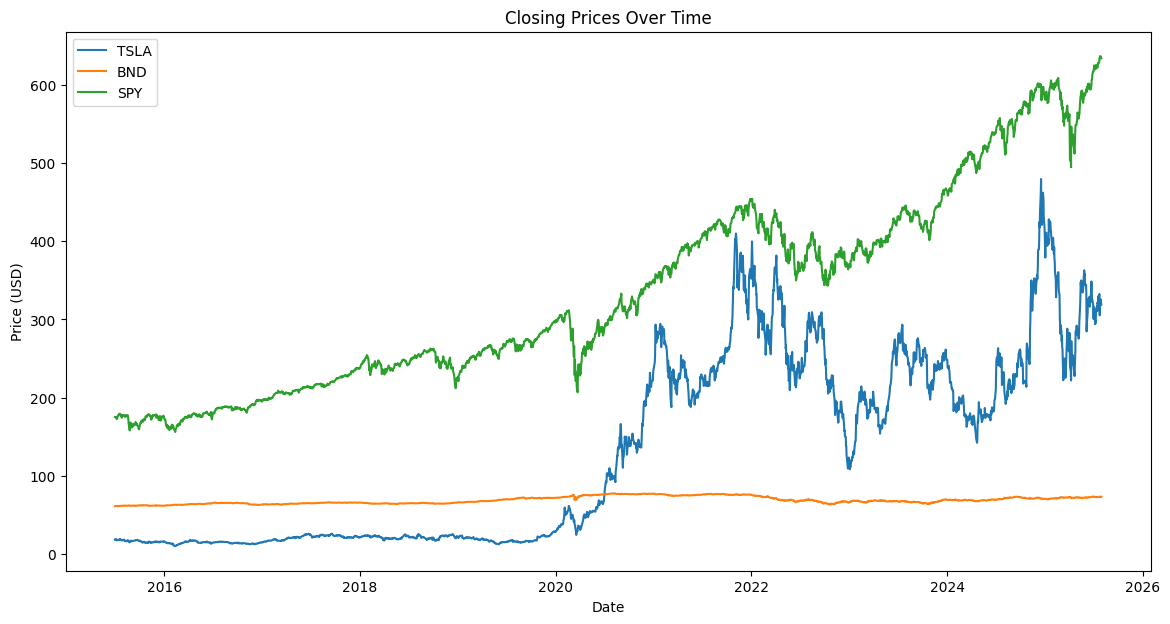

In [10]:
plt.figure(figsize=(14,7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


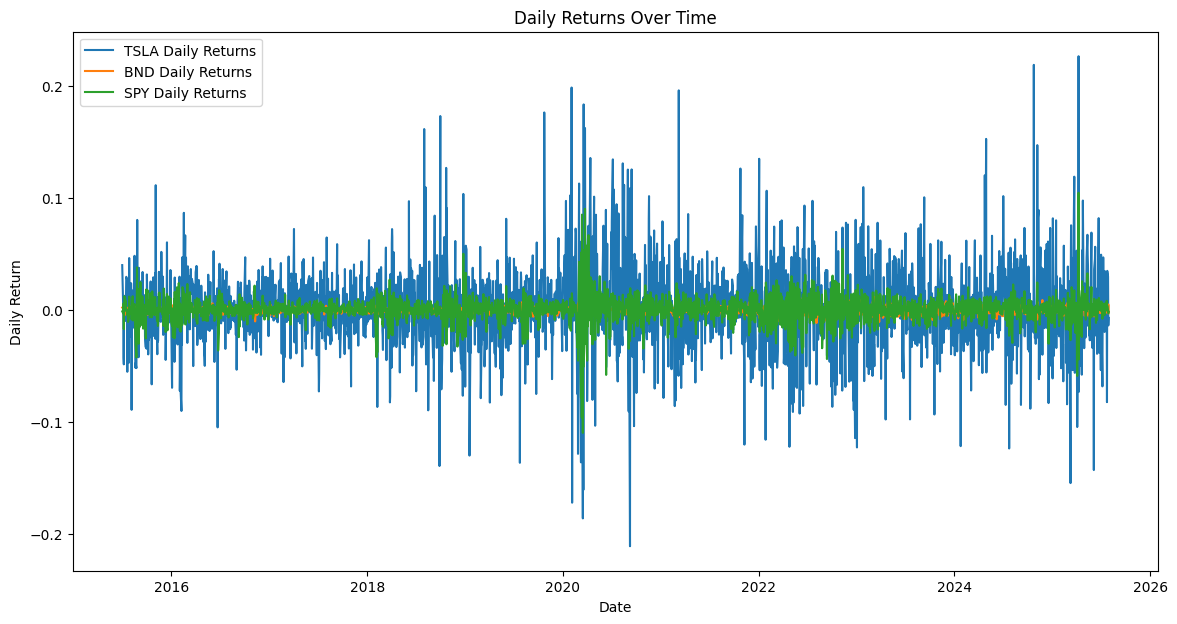

In [11]:
returns = {}
plt.figure(figsize=(14,7))
for ticker in tickers:
    returns[ticker] = data[ticker]['Close'].pct_change().dropna()
    plt.plot(returns[ticker], label=f'{ticker} Daily Returns')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


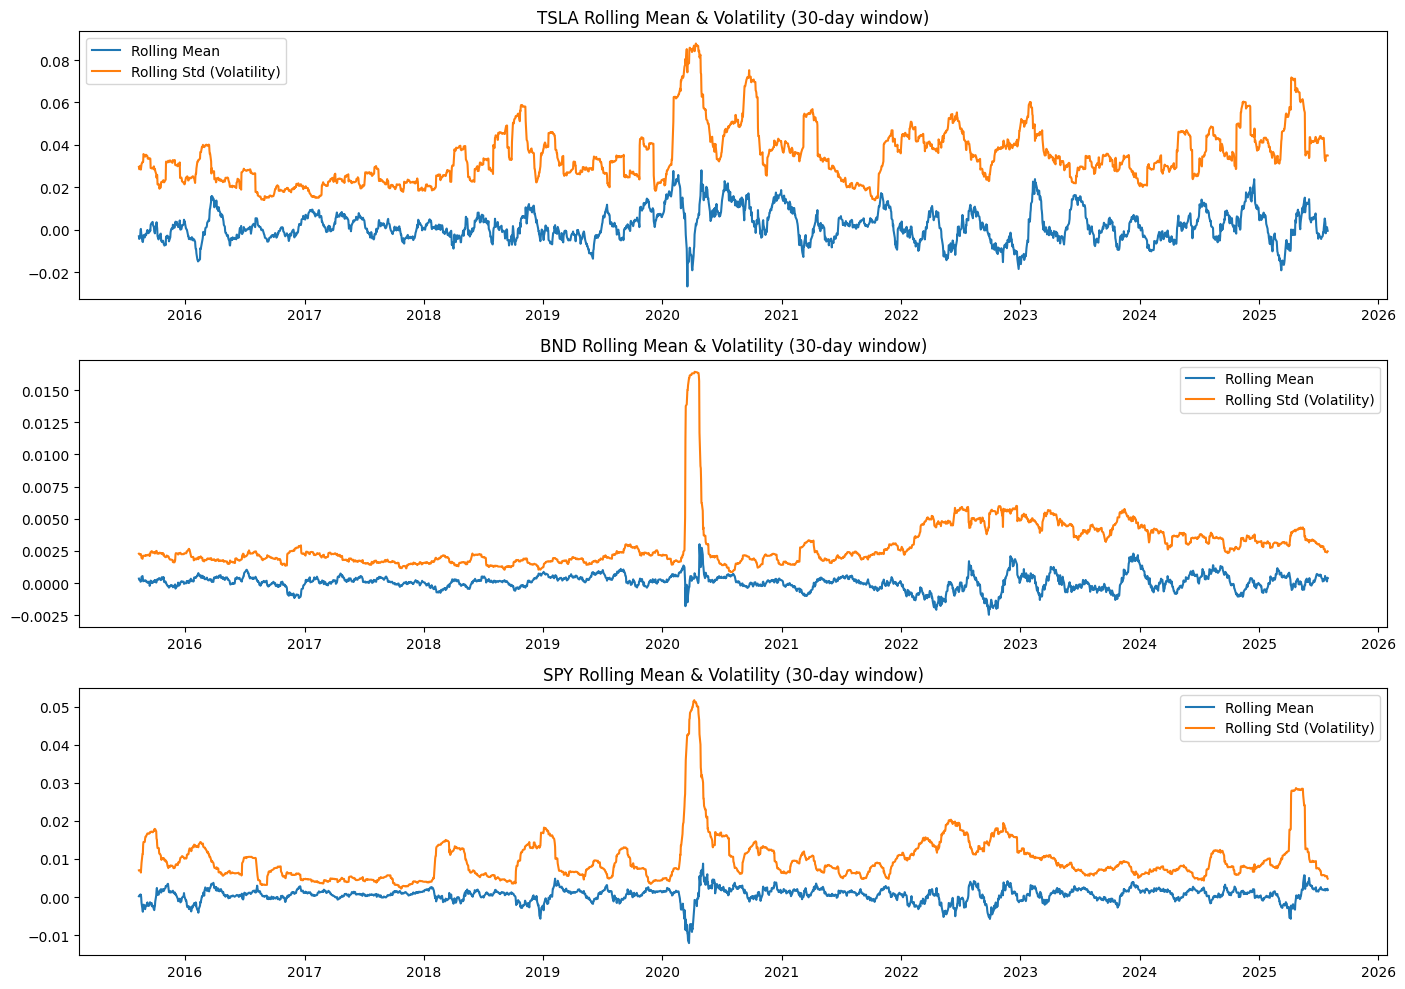

In [12]:
window = 30
plt.figure(figsize=(14,10))
for i, ticker in enumerate(tickers):
    plt.subplot(len(tickers), 1, i+1)
    rolling_mean = returns[ticker].rolling(window).mean()
    rolling_std = returns[ticker].rolling(window).std()
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std (Volatility)')
    plt.title(f'{ticker} Rolling Mean & Volatility (30-day window)')
    plt.legend()
plt.tight_layout()
plt.show()


In [16]:
threshold = 0.10

for ticker in tickers:
    series = returns[ticker][ticker]  # select the 'TSLA' column from DataFrame
    large_moves = series[series.abs() > threshold]
    print(f"\n{ticker} days with daily returns > ±{threshold*100}%:")
    print(large_moves)



TSLA days with daily returns > ±10.0%:
Date
2015-11-04    0.111735
2016-06-22   -0.104503
2018-08-02    0.161880
2018-08-07    0.109886
2018-09-28   -0.139015
2018-10-01    0.173471
2018-10-23    0.127189
2018-12-26    0.103930
2019-01-18   -0.129711
2019-07-25   -0.136137
2019-10-24    0.176692
2020-01-30    0.102962
2020-02-03    0.198949
2020-02-04    0.137256
2020-02-05   -0.171758
2020-02-27   -0.128146
2020-03-02    0.113220
2020-03-09   -0.135725
2020-03-12   -0.116172
2020-03-16   -0.185778
2020-03-18   -0.160344
2020-03-19    0.183877
2020-03-24    0.162817
2020-04-13    0.136038
2020-04-27    0.101496
2020-05-01   -0.103034
2020-07-06    0.134794
2020-07-10    0.107848
2020-08-12    0.131236
2020-08-17    0.112031
2020-08-31    0.125689
2020-09-08   -0.210628
2020-09-09    0.109233
2020-09-14    0.125832
2020-09-23   -0.103411
2020-11-18    0.101968
2021-03-09    0.196412
2021-10-25    0.126616
2021-11-09   -0.119903
2022-01-03    0.135317
2022-01-27   -0.115542
2022-01-31  

In [19]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[:4], labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("=> Strong evidence against the null hypothesis, reject H0. Series is stationary.")
    else:
        print("=> Weak evidence against the null hypothesis, fail to reject H0. Series is non-stationary.")
    print('-'*50)

for ticker in tickers:
    adf_test(data[ticker]['Close'], title=f'{ticker} Close Price')
    adf_test(returns[ticker], title=f'{ticker} Daily Returns')


Augmented Dickey-Fuller Test: TSLA Close Price
ADF Statistic : -1.4188720053968273
p-value : 0.5731959514207222
# Lags Used : 27
Number of Observations Used : 2507
=> Weak evidence against the null hypothesis, fail to reject H0. Series is non-stationary.
--------------------------------------------------
Augmented Dickey-Fuller Test: TSLA Daily Returns
ADF Statistic : -34.68109047254185
p-value : 0.0
# Lags Used : 1
Number of Observations Used : 2532
=> Strong evidence against the null hypothesis, reject H0. Series is stationary.
--------------------------------------------------
Augmented Dickey-Fuller Test: BND Close Price
ADF Statistic : -1.5362474857790485
p-value : 0.5155101485780501
# Lags Used : 13
Number of Observations Used : 2521
=> Weak evidence against the null hypothesis, fail to reject H0. Series is non-stationary.
--------------------------------------------------
Augmented Dickey-Fuller Test: BND Daily Returns
ADF Statistic : -9.889782333249581
p-value : 3.5834284961421

In [23]:
risk_free_rate = 0.02  # 2% annual

for ticker in tickers:
    daily_returns = returns[ticker][ticker]  # single series
    var_5 = np.percentile(daily_returns, 5)
    sharpe_ratio = (daily_returns.mean() * 252 - risk_free_rate) / (daily_returns.std() * np.sqrt(252))
    
    print(f"{ticker} Risk Metrics:")
    print(f"5% Daily VaR: {var_5:.4f}")
    print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
    print('-'*50)


TSLA Risk Metrics:
5% Daily VaR: -0.0547
Annualized Sharpe Ratio: 0.7446
--------------------------------------------------
BND Risk Metrics:
5% Daily VaR: -0.0049
Annualized Sharpe Ratio: -0.0073
--------------------------------------------------
SPY Risk Metrics:
5% Daily VaR: -0.0172
Annualized Sharpe Ratio: 0.6844
--------------------------------------------------
